### ML MINI PROJECT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Questions -
1. Read the dataset and view the first 10 rows of it.
2. Check the shape/dimension of the dataset
3. Check for the missing values.Display number of missing values per column.
4. Investigate and predict the missing BMI Value.
5. Check the datatype, number of non null values and name of each variable in the dataset.
6. Check the descriptive statistics of the dataset.
7. Visualize the proportion of Stroke samples in the dataset.
8. Visualize the Distribution of Male and Female Ages. Write the Observation.
10.Visualize the stroke sample based on
a) BMI and Glucose Level
b) BMI and Age
11. Using the pie chart visualizes the proportion of different smoking categories among the
stroke population.
12. Perform hypothesis testing to find the significant variables.
13. Drop the unnecessary columns.
14. Write the code to replace following categories columns in integer format as follow –
a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
 b) ever_married('Yes': 1, 'No': 0)
 c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)
15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.
16. List down columns that are highly skewed.
17. List down the columns that are highly kurtosis.
18. Find the distribution of all variables with respect to the outcome 'stroke' variable.
19. Plot the heatmap for correlation matrix for the given dataset. Write the observation.
Especially note down columns that are highly correlated (Positive or negative correlation,
consider 0.7 to 1 as high)
20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.
21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach
to balanced the dataset by using the correct technique.
22. Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of 
performance on the given dataset. 
 Model Evaluation 
- Evaluate the models using appropriate evaluation metrics.

### 1. Read the dataset and view the first 10 rows of it.

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### 2. Check the shape/dimension of the dataset

In [4]:
df.shape

(5110, 12)

### 3. Check for the missing values.Display number of missing values per column.

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 4. Investigate and predict the missing BMI Value.

In [6]:
df_bmi_miss = df[df['bmi'].isna()]
df_bmi_miss

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [7]:
#group by age and calculate median bmi
df_median_bmi = df.groupby('age')['bmi'].median()
df_median_bmi

age
0.08     15.50
0.16     13.90
0.24     18.50
0.32     17.80
0.40     15.85
         ...  
78.00    27.50
79.00    28.20
80.00    28.70
81.00    27.65
82.00    27.10
Name: bmi, Length: 104, dtype: float64

In [8]:
#fill null values in bmi with median bmi by age
df['bmi'] = df['bmi'].fillna(df['age'].map(df_median_bmi))

In [9]:
df['bmi'].isnull().sum()

0

All the null values in the BMI column has been imputed with the median value of their respective age.

### 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 6. Check the descriptive statistics of the dataset.

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.881184,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.726308,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.200000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### 7. Visualize the proportion of Stroke samples in the dataset.

In [35]:
stroke_counts = df['stroke'].value_counts(normalize=True)*100
stroke_counts

0    95.127202
1     4.872798
Name: stroke, dtype: float64

<Figure size 800x600 with 0 Axes>

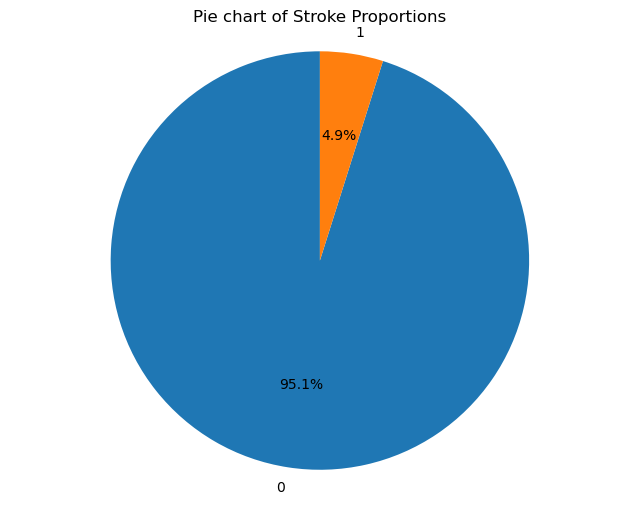

In [34]:
plt.figure(figsize=(8, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart of Stroke Proportions')
plt.axis('equal')
plt.show()

* 95.1% of the given samples are not affected by stroke.
* 4.9% are affected by stroke.

### 8. Visualize the Distribution of Male and Female Ages. Write the Observation.

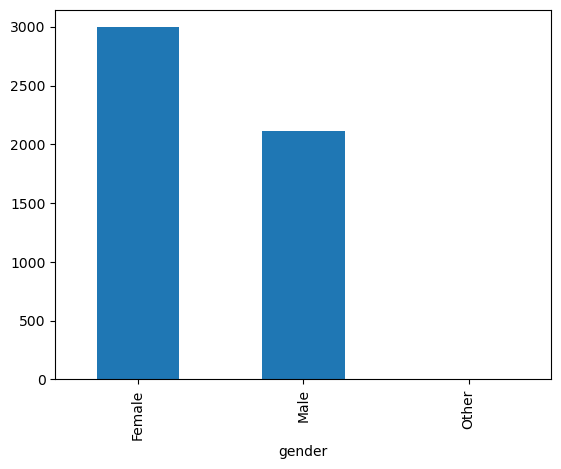

In [37]:
df.groupby('gender')['age'].count().plot(kind = 'bar')
plt.show()

In [38]:
df.groupby('gender')['age'].count()

gender
Female    2994
Male      2115
Other        1
Name: age, dtype: int64

Females are more in number compared to male. There is 1 person in the other gender category.

### 9. Visualize the stroke sample based on a) BMI and Glucose Level b) BMI and Age

#### a) BMI and Glucose Level

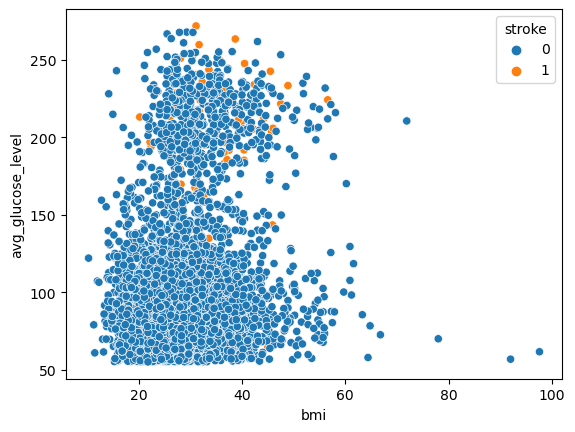

In [39]:
sns.scatterplot(x=df['bmi'],y=df['avg_glucose_level'],hue=df['stroke'])
plt.show()

#### b) BMI and Age

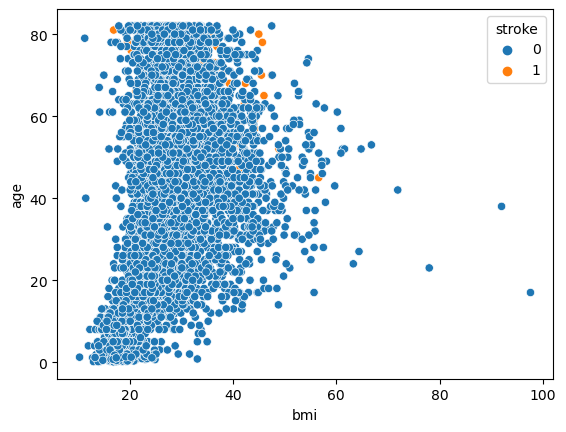

In [40]:
sns.scatterplot(x=df['bmi'],y=df['age'],hue=df['stroke'])
plt.show()

### 10. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

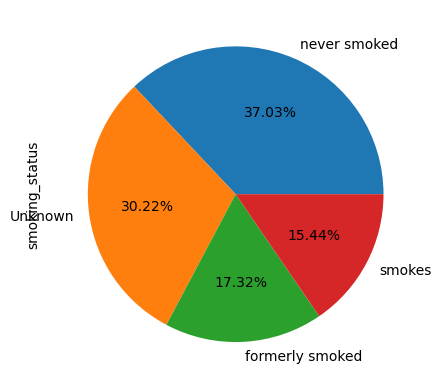

In [43]:
df['smoking_status'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

### 11. Perform hypothesis testing to find the significant variables.

In [44]:
#H0: The variable is insigificant ( no relationship between variable and target)
#H1: The variable is sigificant ( there is a relationship between variable and target)
# We carry out tests for each column w.r.t the target column
df = df.drop(columns='id')
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Numerical Variables

In [45]:
num_cols = df.drop(columns = 'stroke').select_dtypes(np.number).columns
num_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [46]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [49]:
from statsmodels.stats.weightstats import ztest

In [50]:
p_val = {}
for i in num_cols:
    x1 = df[(df['stroke'] == 0)][i]
    x2 = df[(df['stroke'] == 1)][i]
    z_score, pval = ztest(x1 = x1, x2 = x2 , value = 0, alternative = 'two-sided')
    p_val[i] = pval

p_val

{'age': 4.512034549927382e-73,
 'hypertension': 3.0545852740333194e-20,
 'heart_disease': 2.2171764460236954e-22,
 'avg_glucose_level': 1.8461548402658107e-21,
 'bmi': 0.004193049401803646}

* All variables are significant (as we reject the null hypothesis)

#### Categorical Variables

In [52]:
# Categorical Columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [53]:
# When both the columns that need to be tested are categorical, we will do a chi_square contingency test
from statsmodels.stats import weightstats as stests
from scipy import stats

p_vals = {}
for i in cat_cols:
    table = pd.crosstab(df[i], df['stroke'])
    observed_value = table.values
    chi2, p, dof, expected = stats.chi2_contingency(observed_value,correction=False)
    p_vals[i] = p
    
p_vals

{'gender': 0.7895490538408245,
 'ever_married': 9.58932501427625e-15,
 'work_type': 5.397707801896119e-10,
 'Residence_type': 0.26915903227493193,
 'smoking_status': 2.0853997025008455e-06}

* p-value is greater than 0.05 for gender and residence_type, hence, these columns are insignificant (as we fail to reject null hypothesis) 
* Others are significant (as we reject the null hypothesis)

### 12.) Drop the unnecessary columns

In [54]:
df = df.drop(columns=['gender','Residence_type','bmi'])
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,202.21,never smoked,1
2,80.0,0,1,Yes,Private,105.92,never smoked,1
3,49.0,0,0,Yes,Private,171.23,smokes,1
4,79.0,1,0,Yes,Self-employed,174.12,never smoked,1


### 13. Write the code to replace following categories columns in integer format as follows

#### a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)

In [56]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [57]:
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2})
df['work_type']

0       0
1       1
2       0
3       0
4       1
       ..
5105    0
5106    1
5107    1
5108    0
5109    2
Name: work_type, Length: 5110, dtype: int64

#### b) ever_married('Yes': 1, 'No': 0)

In [58]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [59]:
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df['ever_married']

0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 5110, dtype: int64

#### c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [60]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [61]:
df['smoking_status'] = df['smoking_status'] .replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})
df['smoking_status']

0       2
1       0
2       0
3      -1
4       0
       ..
5105    0
5106    0
5107    0
5108    2
5109    1
Name: smoking_status, Length: 5110, dtype: int64

In [62]:
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,67.0,0,1,1,0,228.69,2,1
1,61.0,0,0,1,1,202.21,0,1
2,80.0,0,1,1,0,105.92,0,1
3,49.0,0,0,1,0,171.23,-1,1
4,79.0,1,0,1,1,174.12,0,1


### 14. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

BMI column has been removed as it was insignificant.

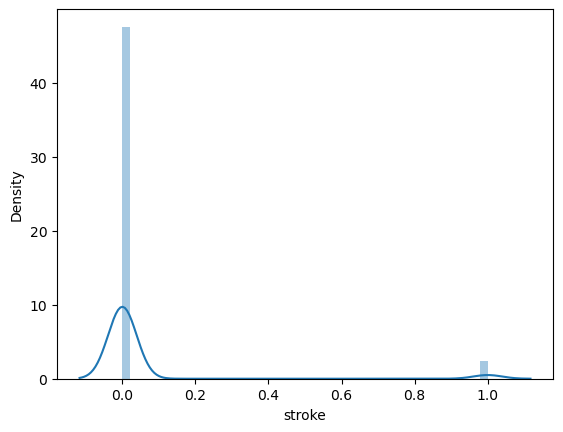

In [64]:
sns.distplot(df['stroke'])
plt.show()

### 15. List down columns that are highly skewed.

In [67]:
df.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.585971
avg_glucose_level    1.572284
smoking_status       0.082279
stroke               4.193284
dtype: float64

* The hypertension, stroke and heart_disease variables are highly skewed.

### 16. List down the columns that have high kurtosis.

In [69]:
df.kurt()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.059562
avg_glucose_level     1.680479
smoking_status       -0.922415
stroke               15.589736
dtype: float64

* The stroke, hypertension and heart_disease variables have high kurtosis.

### 17. Find the distribution of all variables with respect to the outcome 'stroke' variable.

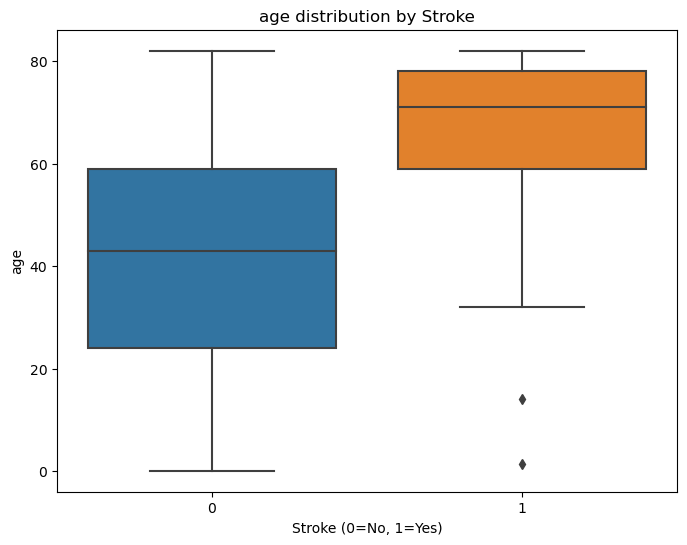

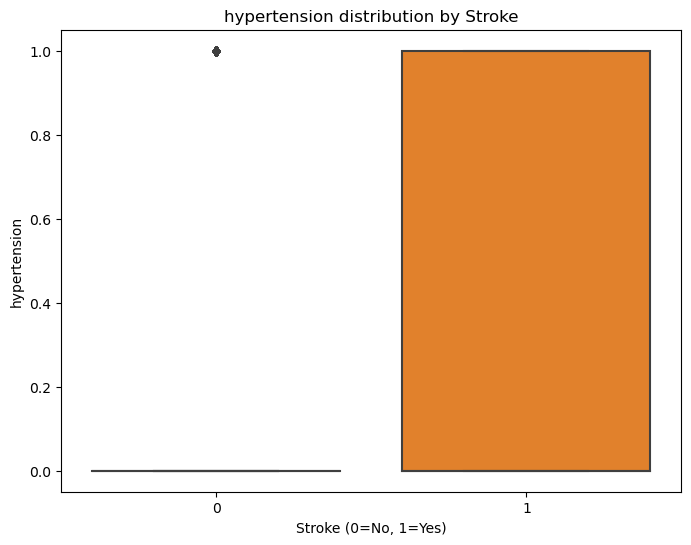

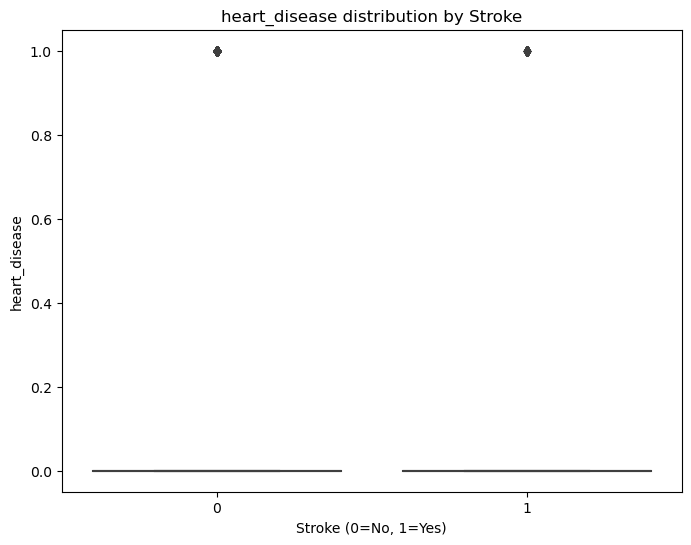

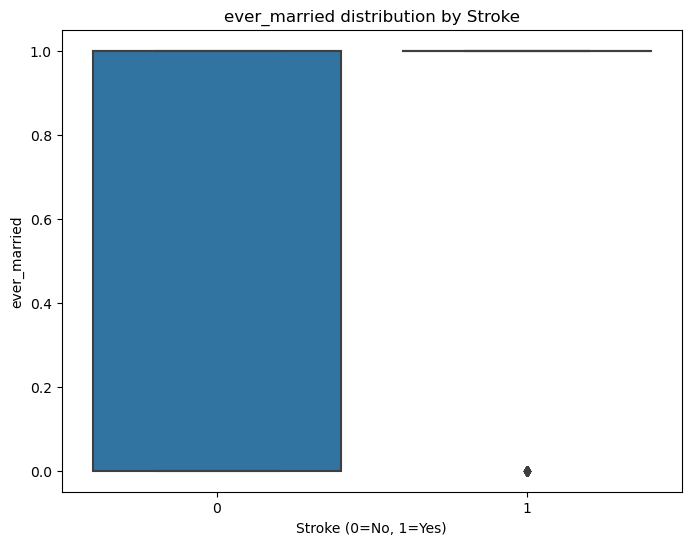

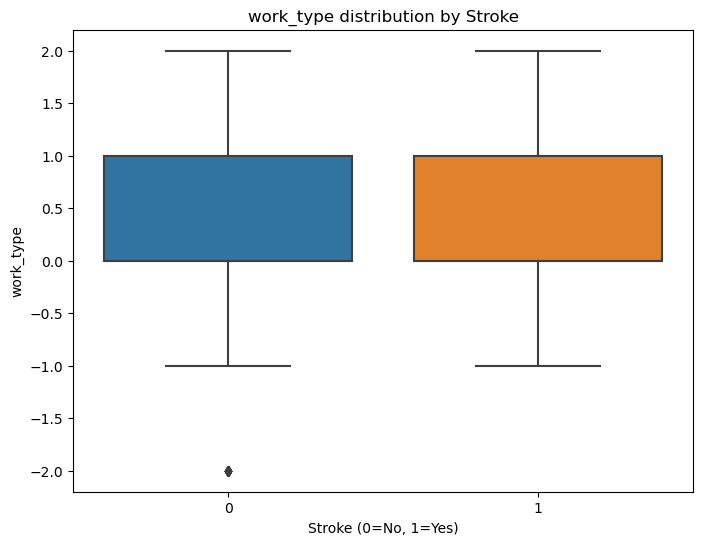

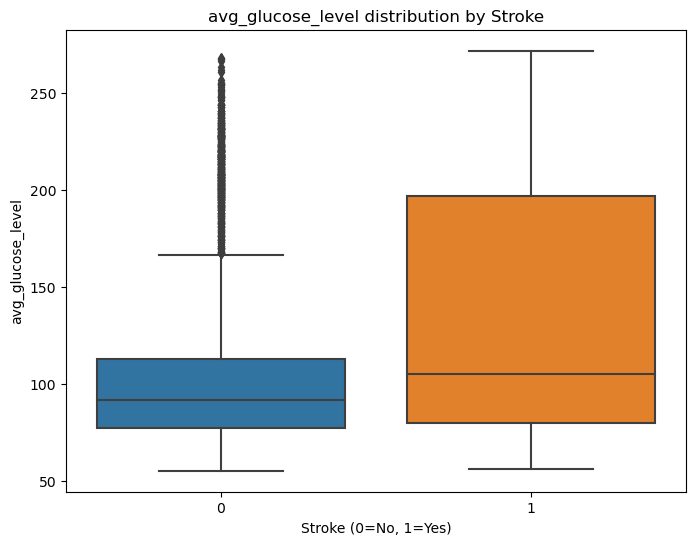

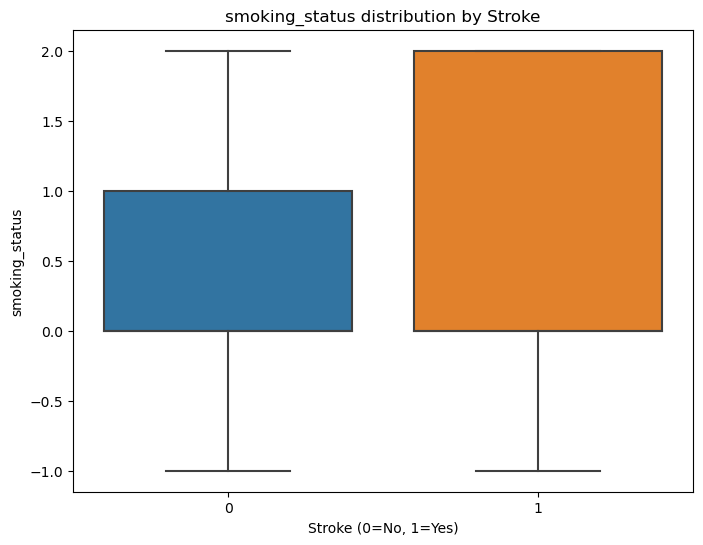

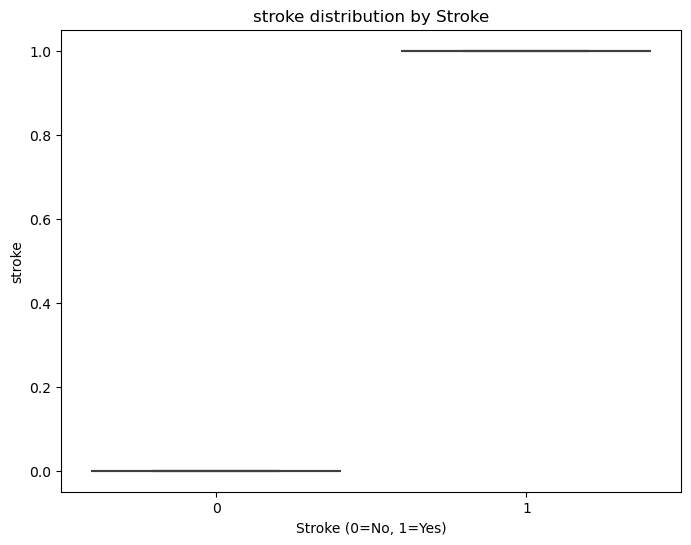

In [76]:
for i in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='stroke', y=i, data=df)
    plt.xlabel('Stroke (0=No, 1=Yes)')
    plt.ylabel(i)
    plt.title(f'{i} distribution by Stroke')
    plt.show()

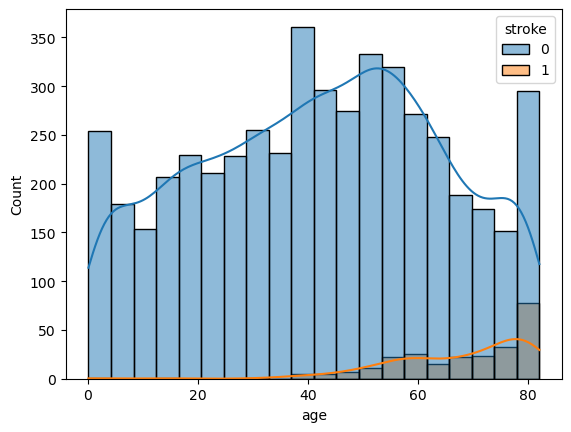

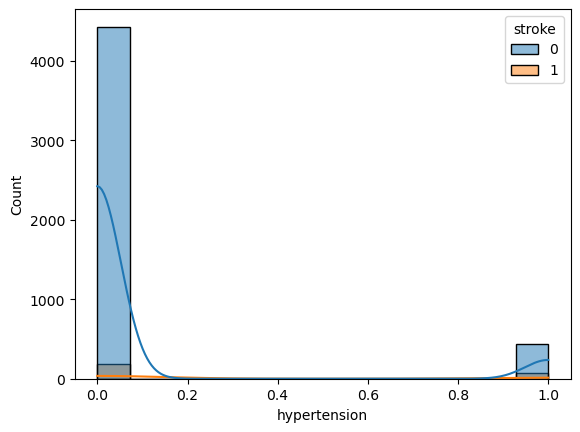

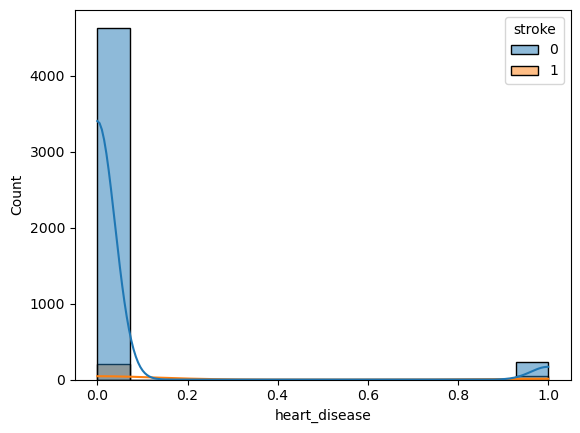

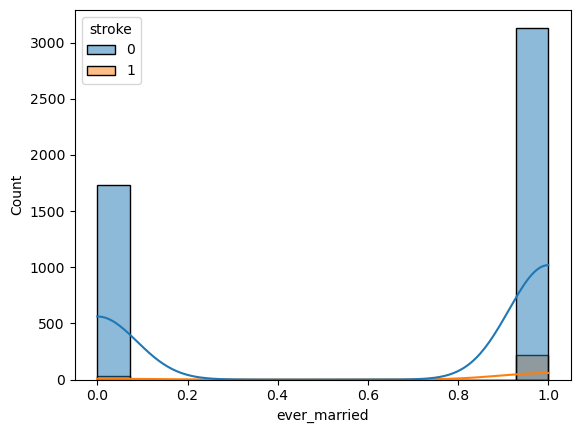

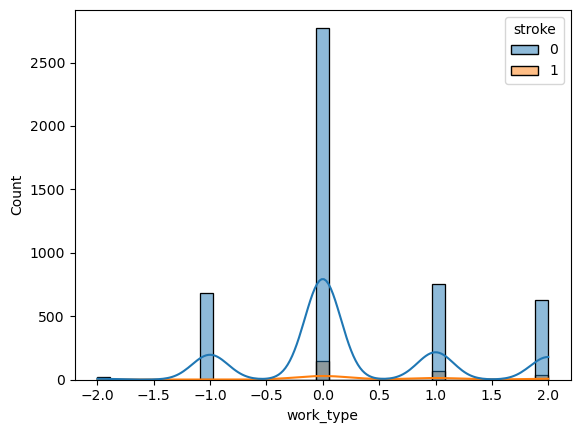

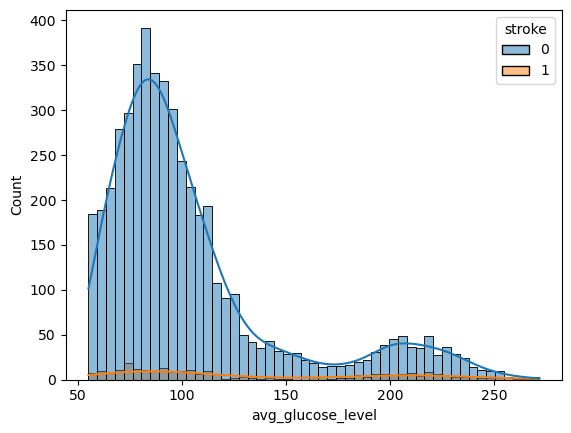

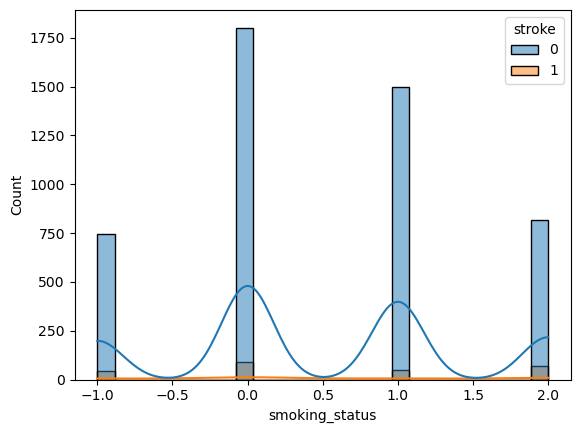

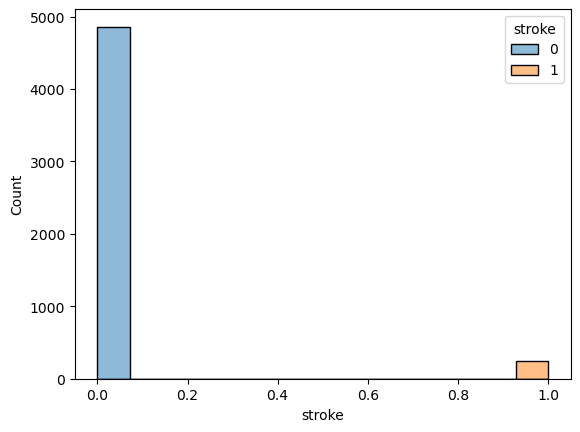

In [82]:
for i in df.columns:   
    sns.histplot(x=df[i],kde=True,hue = df["stroke"])
    plt.show()

### 18. Plot the heatmap for correlation matrix for the given dataset. Write the observation.
#### Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)

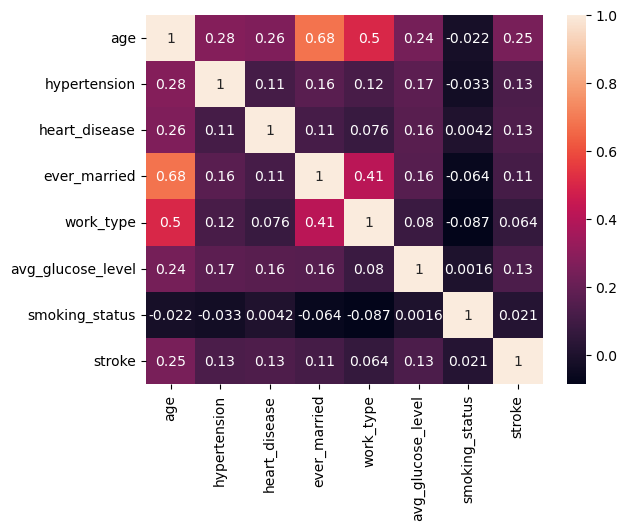

In [71]:
sns.heatmap(df.corr(),annot=True)
plt.show()

None of the features have a strong correlation with the output variable.

### 19. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

In [85]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke',axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [86]:
print('X_train',X_train.shape)
print('X_test',X_train.shape)
print('y_train',X_train.shape)
print('y_test',X_train.shape)

X_train (3577, 7)
X_test (3577, 7)
y_train (3577, 7)
y_test (3577, 7)


### 20. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

In [88]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [90]:
df['stroke'].value_counts(normalize=True)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

Data is highly imbalanced.

#### Using SMOTE to balance the categories in the target variable.

In [92]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0,sampling_strategy=0.7)
X_res,y_res=sm.fit_resample(X_train,y_train)
y_res.value_counts()

0    3404
1    2382
Name: stroke, dtype: int64

### 21. Model Selection, Hyperparameter tuning and Evaluation
* Try different models and fine tune their performance until you get the desired level of performance on the given dataset. 

* Evaluate the models using appropriate evaluation metrics.

In [93]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_res = pd.DataFrame(data = ss.fit_transform(X_res), columns = X_res.columns)
X_test = pd.DataFrame(data = ss.transform(X_test), columns = X_test.columns)

#### Random Forest Classifier

In [100]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_res, y_res)

In [104]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1457
           1       0.12      0.16      0.14        76

    accuracy                           0.90      1533
   macro avg       0.54      0.55      0.54      1533
weighted avg       0.91      0.90      0.91      1533



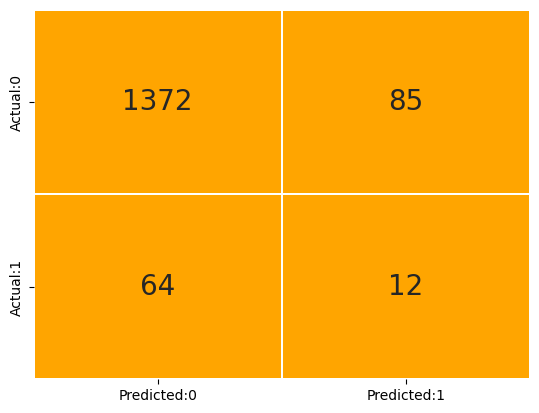

In [109]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

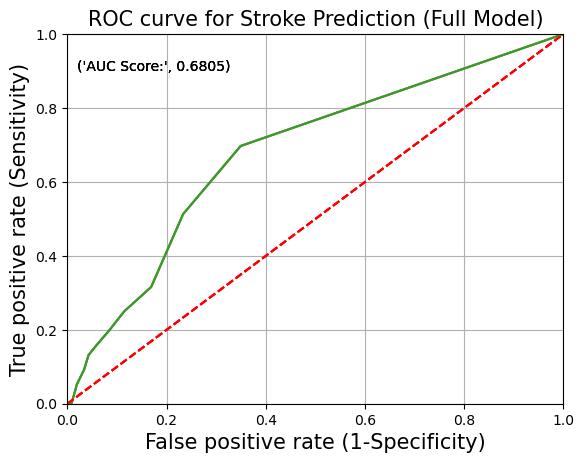

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke Prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} 



In [115]:
rf_classification = RandomForestClassifier(criterion= 'entropy', max_depth=10, max_features='sqrt',
                                           max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10)
rf_model_tuned = rf_classification.fit(X_res, y_res)

In [116]:
y_pred_tuned = rf_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1457
           1       0.17      0.42      0.24        76

    accuracy                           0.87      1533
   macro avg       0.57      0.66      0.58      1533
weighted avg       0.93      0.87      0.89      1533



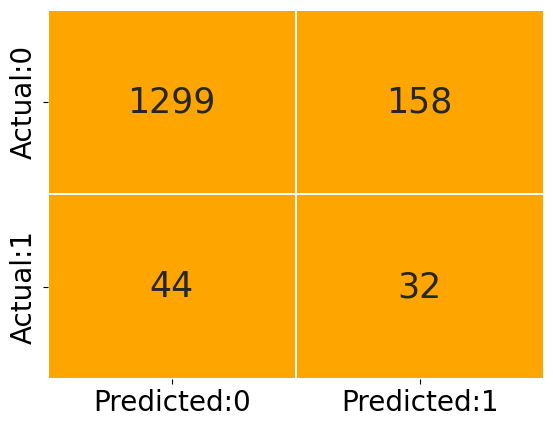

In [117]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

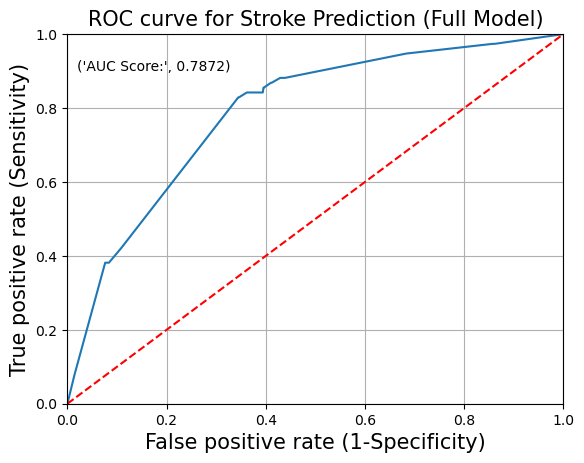

In [118]:
y_pred_prob_tuned = rf_model_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke Prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_tuned),4)))
plt.grid(True)
plt.show()

The Accuracy has increased along with slight increase in F1 Score and AUC Score. Hence it can be noted that the model performance has been increased.

#### Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

LR =LogisticRegression()
lr_model=LR.fit(X_res, y_res)

In [120]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1457
           1       0.15      0.54      0.23        76

    accuracy                           0.82      1533
   macro avg       0.56      0.69      0.56      1533
weighted avg       0.93      0.82      0.87      1533



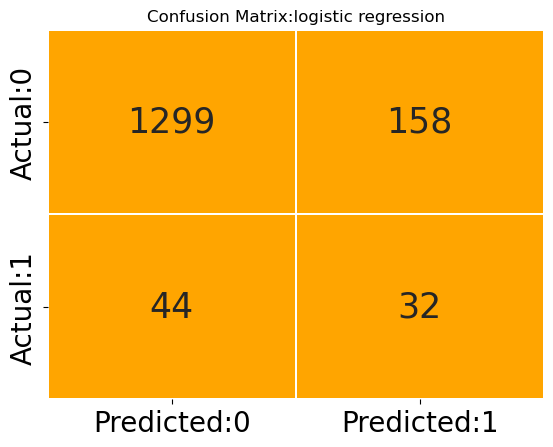

In [122]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix:logistic regression')
plt.show()

In [123]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [124]:
tuned_paramaters = [{'C': [0.3,0.7,1]}]
                     

logistic_regression = LogisticRegression(random_state = 10)

lr_grid = GridSearchCV(estimator =logistic_regression, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

lr_grid_model = lr_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', lr_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'C': 0.3} 



In [125]:
lr_classification = LogisticRegression(C=.03)
lr_model_tuned = lr_classification.fit(X_res, y_res)

In [126]:
y_pred_tuned = lr_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1457
           1       0.14      0.53      0.22        76

    accuracy                           0.82      1533
   macro avg       0.56      0.68      0.56      1533
weighted avg       0.93      0.82      0.86      1533



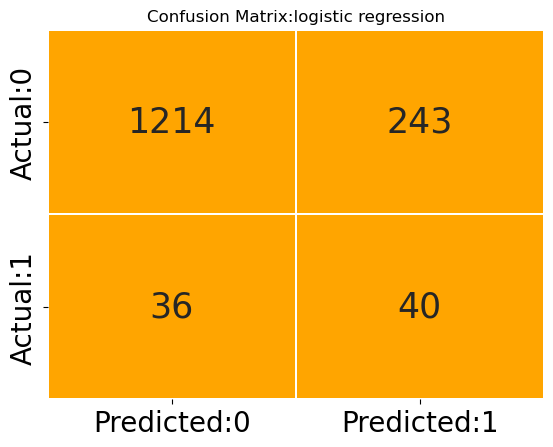

In [128]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix:logistic regression')
plt.show()

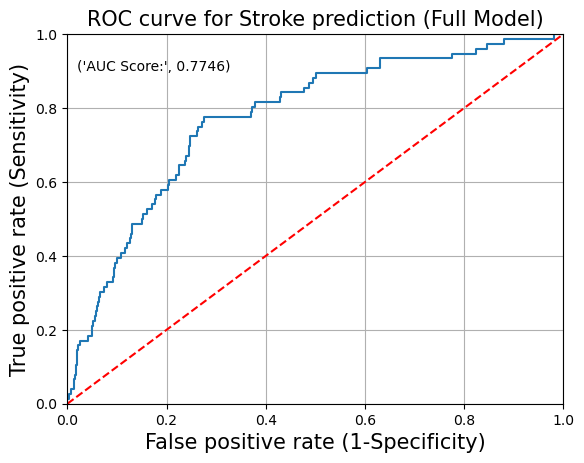

In [129]:
y_pred_prob_tuned = lr_model_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_tuned),4)))
plt.grid(True)
plt.show()

There is only a minute negligible change in accuracy. Minute changes in F1 Score and AUC score can be noted. Hence there is no significant improvement after hyperameter tuning.

#### ADA Boost Classifier

In [130]:
from sklearn.ensemble import AdaBoostClassifier

AD =AdaBoostClassifier()
ad_model=AD.fit(X_res, y_res)

In [131]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1457
           1       0.15      0.54      0.23        76

    accuracy                           0.82      1533
   macro avg       0.56      0.69      0.56      1533
weighted avg       0.93      0.82      0.87      1533



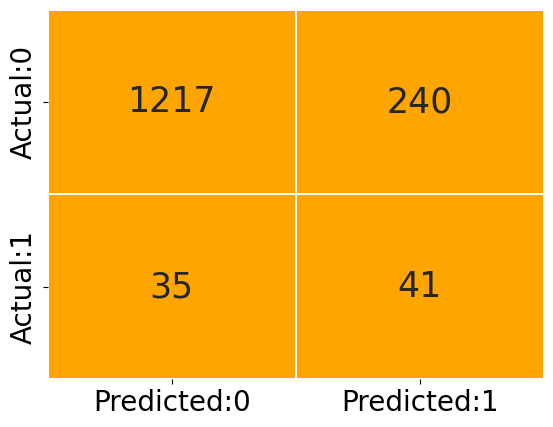

In [132]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

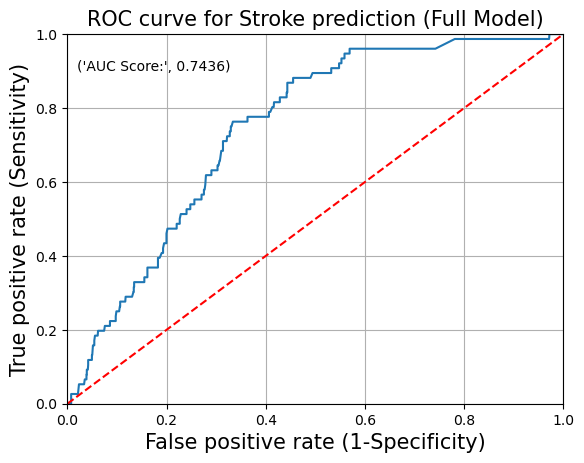

In [133]:
y_pred_prob = ad_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)
plt.show()

In [134]:
tuned_paramaters = [{'n_estimators' : [50, 100, 150], 'random_state' : [10]}]

adaboost_classification = AdaBoostClassifier(random_state = 10)

ad_grid = GridSearchCV(estimator = adaboost_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

ad_grid_model = ad_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', ad_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'n_estimators': 50, 'random_state': 10} 



In [135]:
ad_classification = AdaBoostClassifier(n_estimators=100)
ad_model_tuned = ad_classification.fit(X_res, y_res)

In [136]:
y_pred_tuned = ad_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1457
           1       0.10      0.32      0.15        76

    accuracy                           0.82      1533
   macro avg       0.53      0.58      0.52      1533
weighted avg       0.92      0.82      0.86      1533



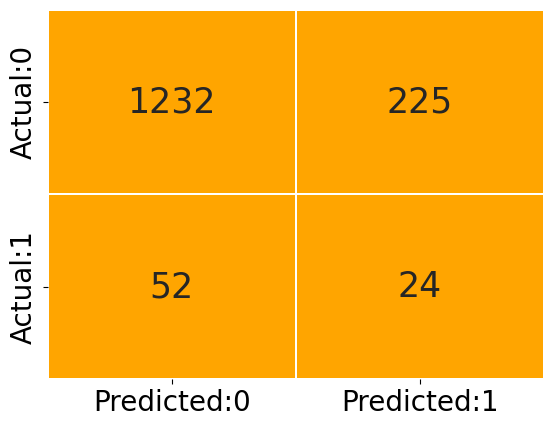

In [137]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

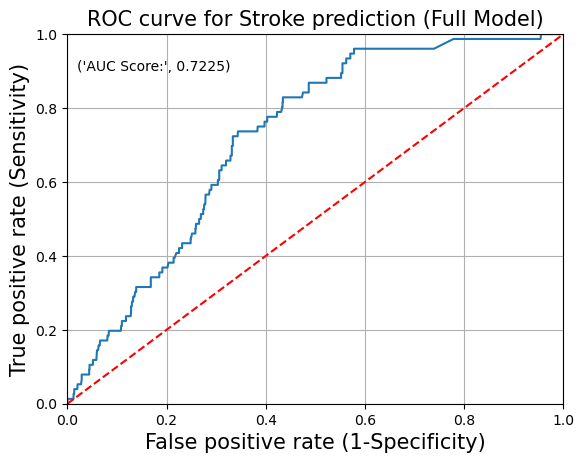

In [138]:
y_pred_prob_tuned = ad_model_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_tuned),4)))
plt.grid(True)
plt.show()

This model can be ignored as the AUC-score, accuracy and f1-score are slightly reduced after the hyperparameter tuning.

#### Decision Tree Classifier

In [139]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree.fit(X_res, y_res)

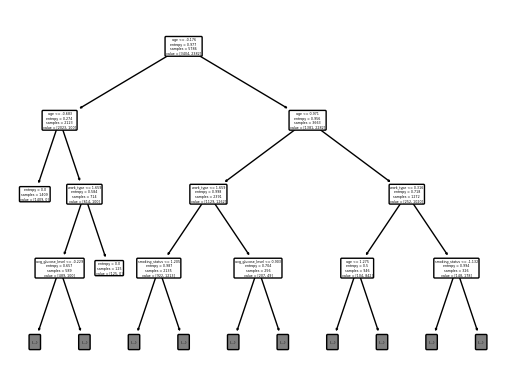

In [140]:
tree.plot_tree(decision_tree, max_depth=3, feature_names = X_train.columns, rounded=True)
plt.show()

In [141]:
train_pred = decision_tree.predict(X_res)
train_report = classification_report(y_res, train_pred)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3404
           1       1.00      1.00      1.00      2382

    accuracy                           1.00      5786
   macro avg       1.00      1.00      1.00      5786
weighted avg       1.00      1.00      1.00      5786



In [142]:
test_pred = decision_tree.predict(X_test)
test_report = classification_report(y_test, test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1457
           1       0.08      0.14      0.10        76

    accuracy                           0.88      1533
   macro avg       0.52      0.53      0.52      1533
weighted avg       0.91      0.88      0.89      1533



* We can infer that there is a slight difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fitted on the train data.

* If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

In [143]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2,6),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1,6)
}]
 
decision_tree = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [144]:
decision_tree_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

decision_tree_model = decision_tree_model.fit(X_res, y_res)

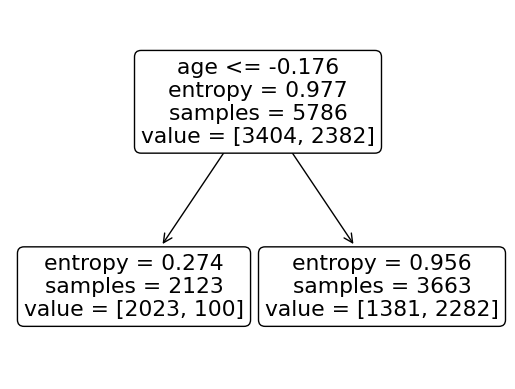

In [145]:
tree.plot_tree(decision_tree_model,feature_names=X_res.columns,rounded=True)
plt.show()

In [146]:
Train_pred = decision_tree_model.predict(X_res)
Train_report = classification_report(y_res, Train_pred)

print('Classification Report for train set: \n', Train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      3404
           1       0.62      0.96      0.76      2382

    accuracy                           0.74      5786
   macro avg       0.79      0.78      0.74      5786
weighted avg       0.82      0.74      0.74      5786



In [147]:
Test_pred = decision_tree_model.predict(X_test)
Test_report = classification_report(y_test, test_pred)

print('Classification Report for test set: \n', Test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1457
           1       0.08      0.14      0.10        76

    accuracy                           0.88      1533
   macro avg       0.52      0.53      0.52      1533
weighted avg       0.91      0.88      0.89      1533



There is no change in f1 score and accuracy after tuning the data.

#### KNN Classifier

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer

KNN =KNeighborsClassifier()
knn_model=KNN.fit(X_res, y_res)

In [149]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1457
           1       0.12      0.37      0.18        76

    accuracy                           0.83      1533
   macro avg       0.54      0.61      0.54      1533
weighted avg       0.92      0.83      0.87      1533



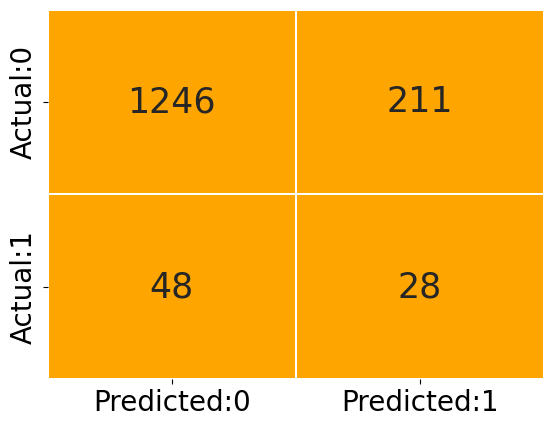

In [150]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

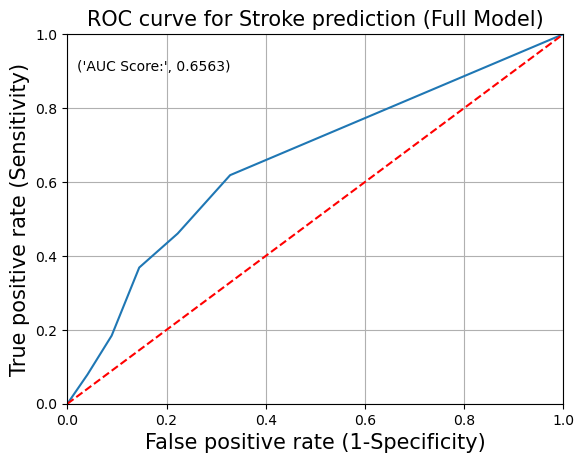

In [151]:
y_pred_prob = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)
plt.show()

In [152]:
tuned_paramaters = [{'n_neighbors' : [4, 6, 8, 10], 'metric' : ['euclidean', 'manhattan', 'chebyshev','minkowski']}]

knn_classification =KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

knn_grid_model = knn_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', knn_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'metric': 'euclidean', 'n_neighbors': 10} 



In [153]:
knn_classification = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn_model_tuned = knn_classification.fit(X_res, y_res)

In [154]:
y_pred_tuned = knn_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      1457
           1       0.10      0.32      0.15        76

    accuracy                           0.83      1533
   macro avg       0.53      0.59      0.53      1533
weighted avg       0.92      0.83      0.87      1533



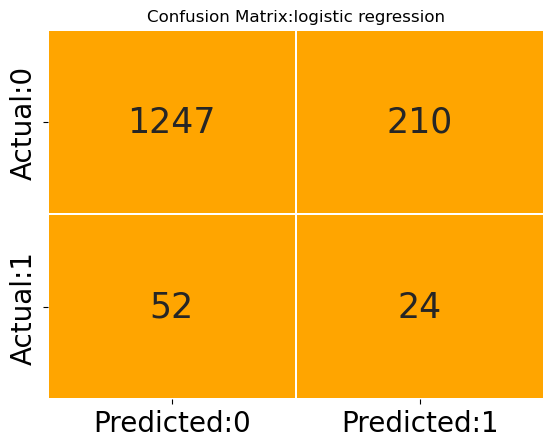

In [155]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix:logistic regression')
plt.show()

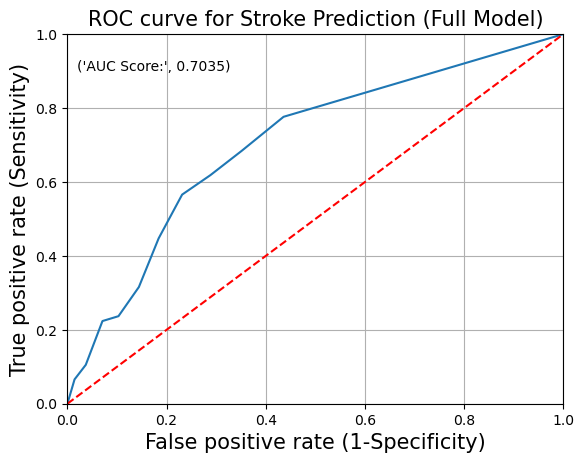

In [156]:
y_pred_prob_tuned = knn_model_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke Prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_tuned),4)))
plt.grid(True)
plt.show()

* There is no change in accuracy, f1 score for positive class has reduced and auc score has increased after tuning, so we will not consider this model.

#### XGBoost Classifier

In [157]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model on train data
xgb_model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [158]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
  
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

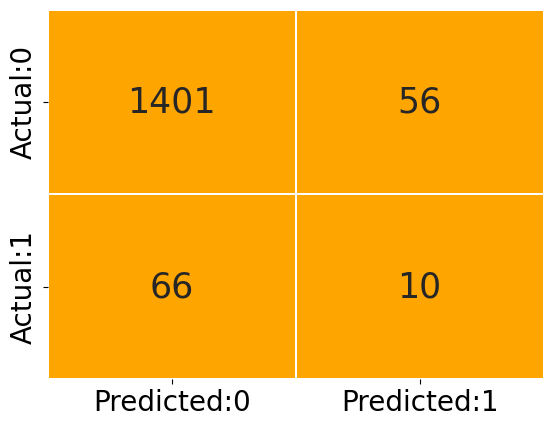

In [159]:
plot_confusion_matrix(xgb_model)

In [160]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [161]:
test_report = get_test_report(xgb_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1457
           1       0.15      0.13      0.14        76

    accuracy                           0.92      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.92      0.92      0.92      1533



In [162]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Stroke prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)
    plt.show()

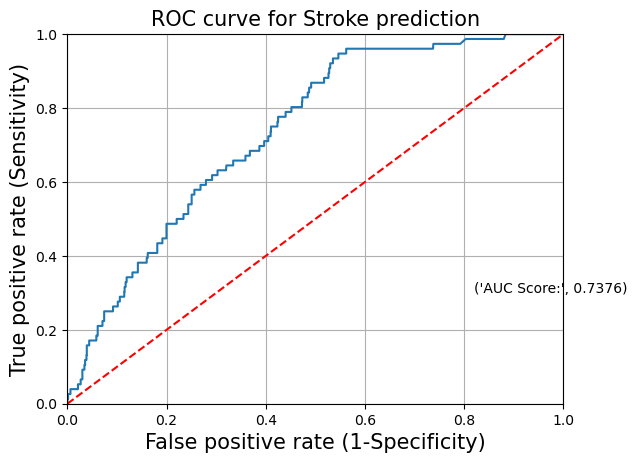

In [163]:
plot_roc(xgb_model)

In [168]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                     'max_depth': range(1,10),
                     'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 4, 'learning_rate': 0.6, 'max_depth': 3} 



In [169]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model = xgb_grid_model.fit(X_train, y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



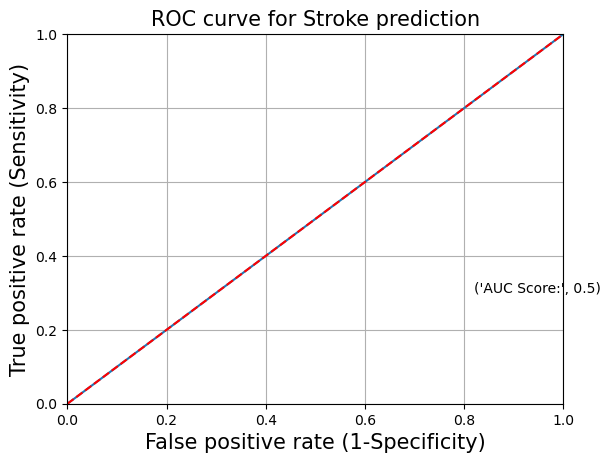

In [170]:
plot_roc(xgb_model)

* The accuracy of final XGboost model has increased after tuning of Hyperparameters of base model. However the AUC score of final XGboost model has decreased the F1 score has become 0 for positive class after tuning of Hyperparameters of base model. Hence this cannot be considered.

### Final Conclusion

##### From all models above the Random Forest gives the best metrics 
* F1-score 0: 0.94 
* F1-score 1: 0.22 
* Accuracy = 0.89
* ROC-AUC score = 0.77 
##### Hence the tuned RANDOM FOREST will be our final model.